In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.io as io
from pathlib import Path
import numpy as np

%matplotlib inline

color_dict = [0, 127, 255]
classweights = [1.0, 1.503971686212565, 1.9888096014508438]

In [2]:
def labelVisualize(num_class,color_dict,img):
    img
    print(np.unique(img))
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        print(img_out[img == i,:])
        img_out[img == i,:] = color_dict[i]
    return img_out# / 255

In [3]:
def softmax(vec, weight):
    exp = weight*np.exp(vec)
    return exp/np.sum(exp)

In [29]:
def show_prediction(n, sat, map, predict):
    sat = io.imread(sat)
    q = io.imread(predict)
    
    p = q
    s = np.shape(q)
    k = np.zeros((s[0], s[1]))
    numUn = 0
    numP = 0
    for i in range(len(q[0])):
        for j in range(len(q[1])):
            if np.argmax(q[i,j,:]) == 1:
                #print(np.argmax(softmax(q[i,j,:], classweights)))
                numP += 1
            elif np.argmax(q[i,j,:]) == 2:
                numUn += 1
            p[i,j,(np.argmax(q[i,j,:]))] = 1
            k[i, j] = (np.argmax(q[i,j,:]))*127
    map = io.imread(map)
#     map = map.reshape((512,512))
    figH1 = plt.figure(n, figsize=(25, 6))
    plt.subplot(1, 5, 1)
    plt.imshow(sat)
    
    plt.subplot(1, 5, 2)
    plt.imshow(map, cmap='gray')

    plt.subplot(1, 5, 3)
    plt.imshow(k, cmap='gray')
    plt.subplot(1, 5, 4)
    plt.imshow(p[..., 1], cmap='gray')
    plt.subplot(1, 5, 5)
    plt.imshow(p[..., 2], cmap='gray')

    plt.colorbar()
    figH1.show()
    print(numUn, numP)

In [30]:
test_dir="../../data/test/"

In [31]:
def get_image_paths(file_name):
    sat_rgb = test_dir + "sat_rgb/" + file_name
    map =  test_dir + "map/" + file_name
    predict = test_dir + "predict/" + file_name
    return {"sat": sat_rgb, "map": map, "predict":predict}

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


3406 1173
1500 1935
2199 2396
2085 3289
2896 2176
436 4665
390 2429
975 2621
456 701
20 6212
2703 2205
4543 930
160 446
341 2150
2790 506
1383 2697
809 2128
4445 2464
1069 458
1310 2610


/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


214 3122


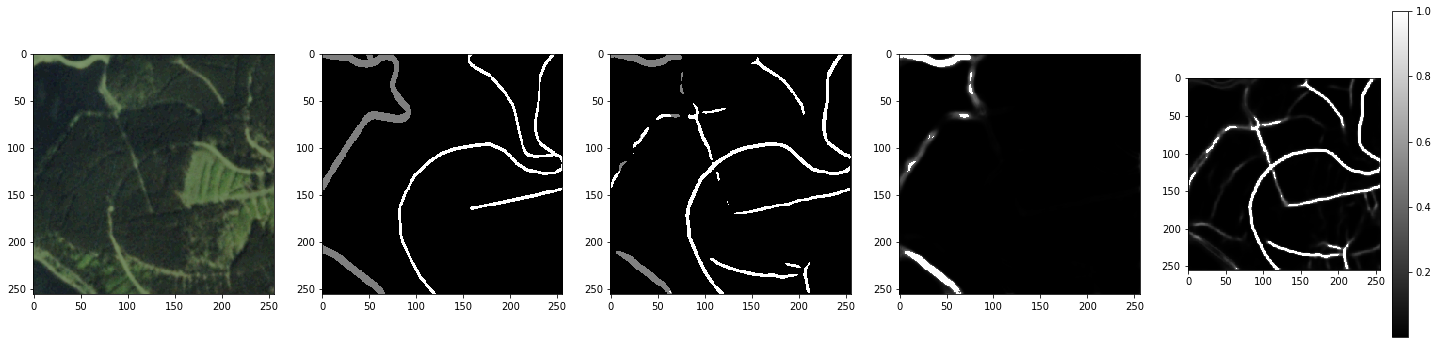

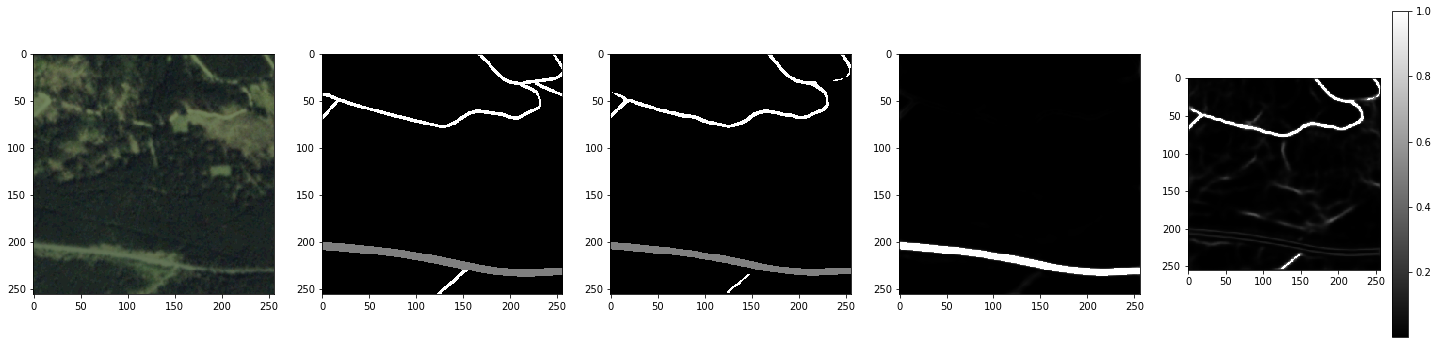

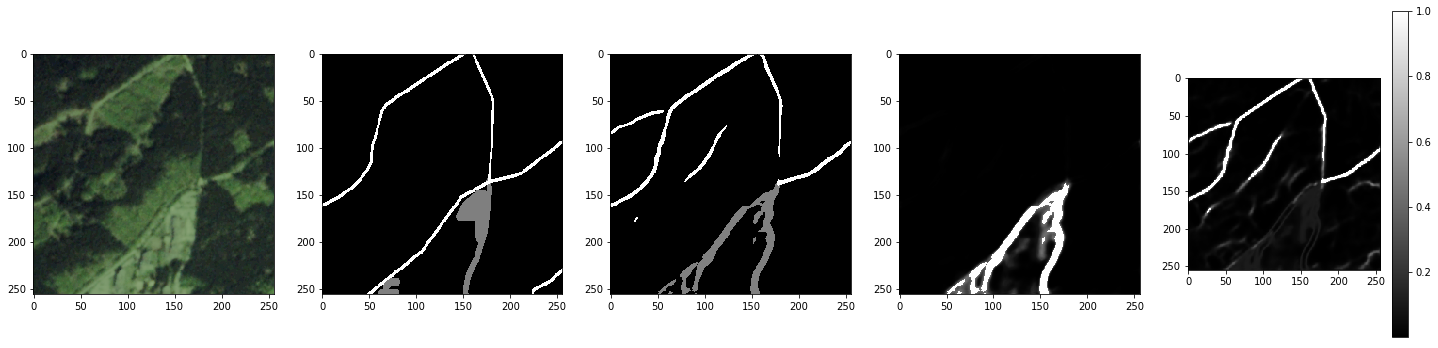

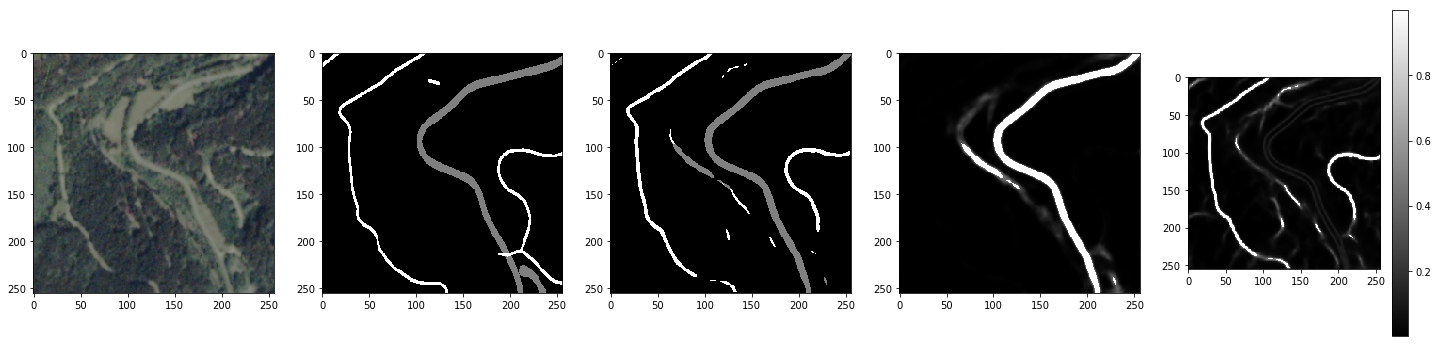

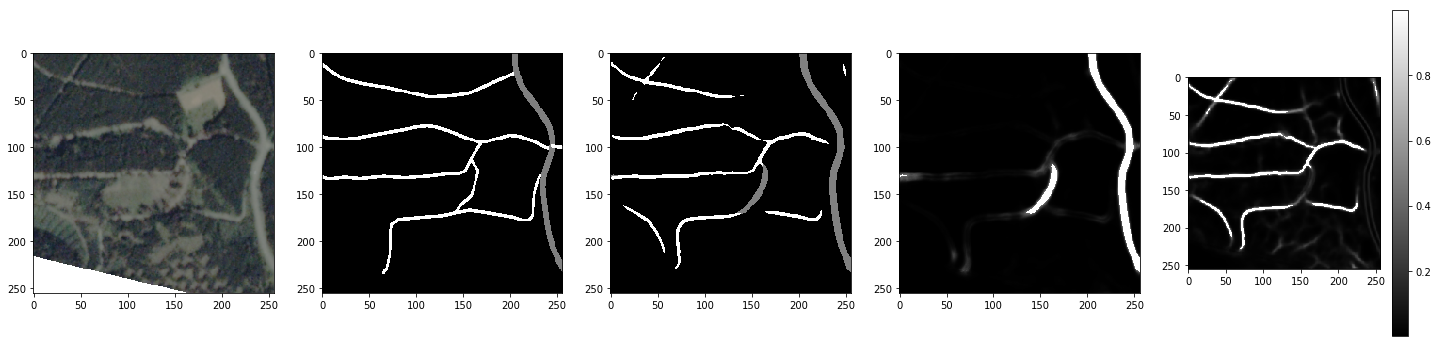

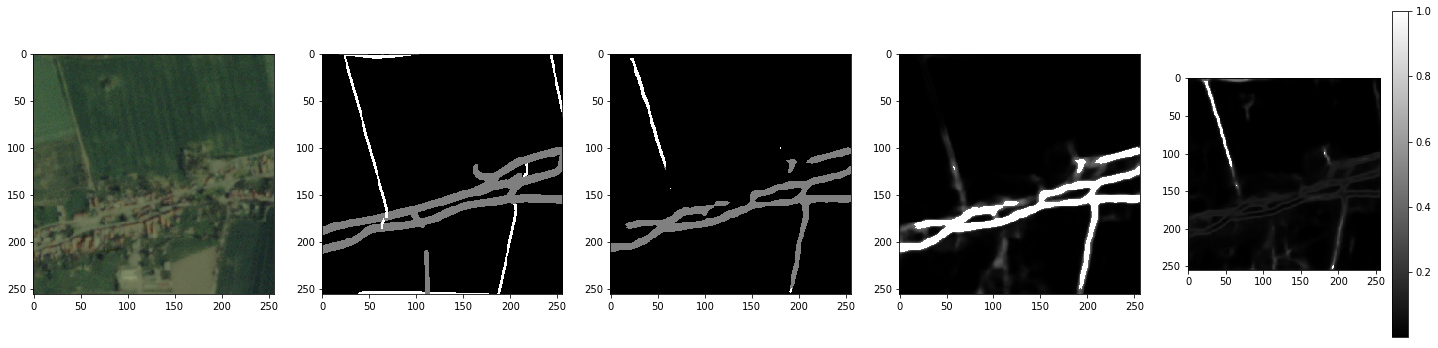

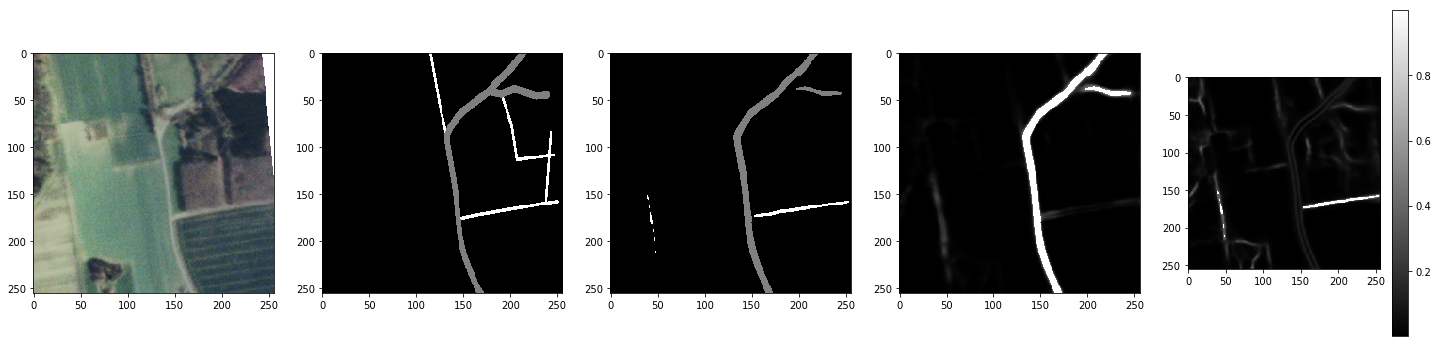

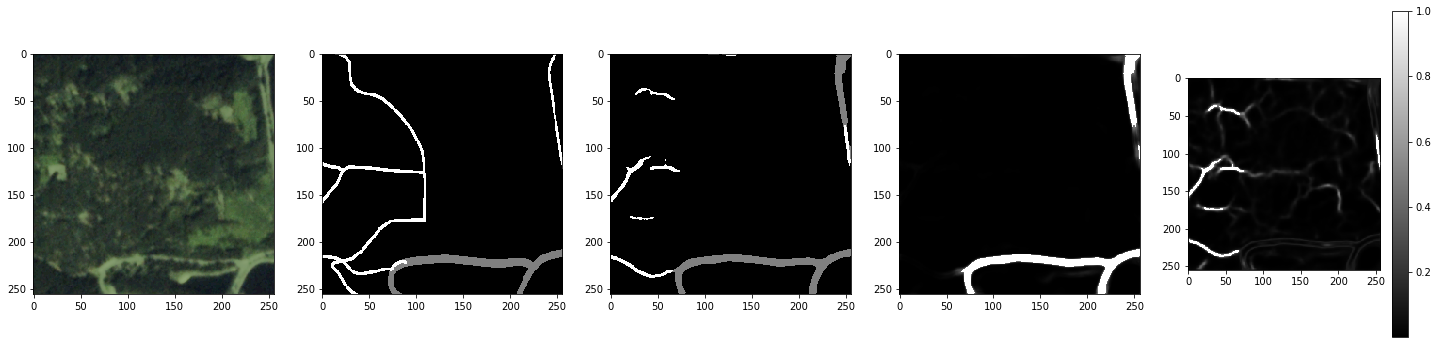

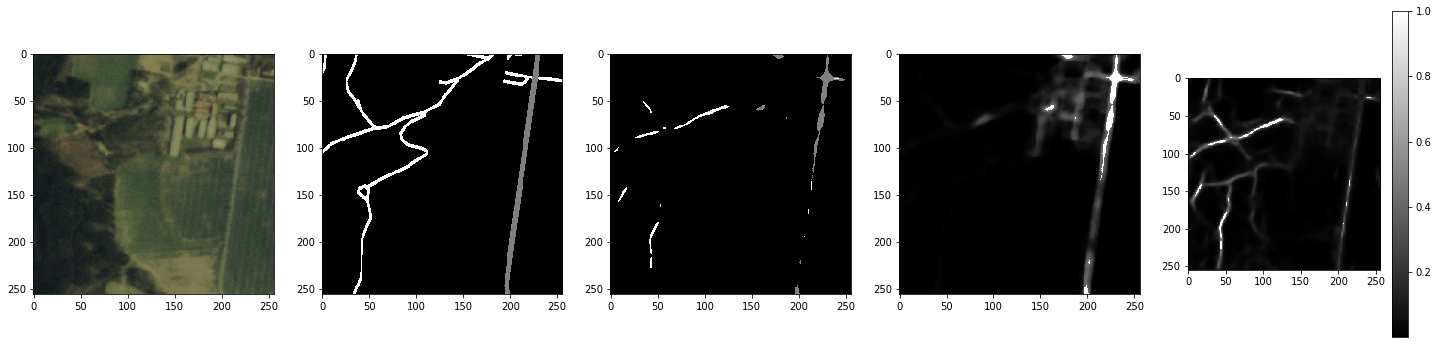

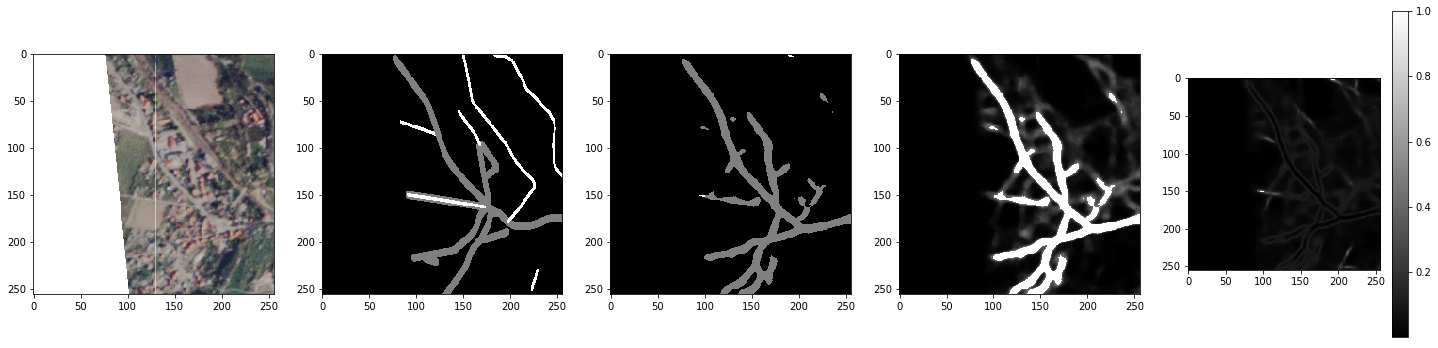

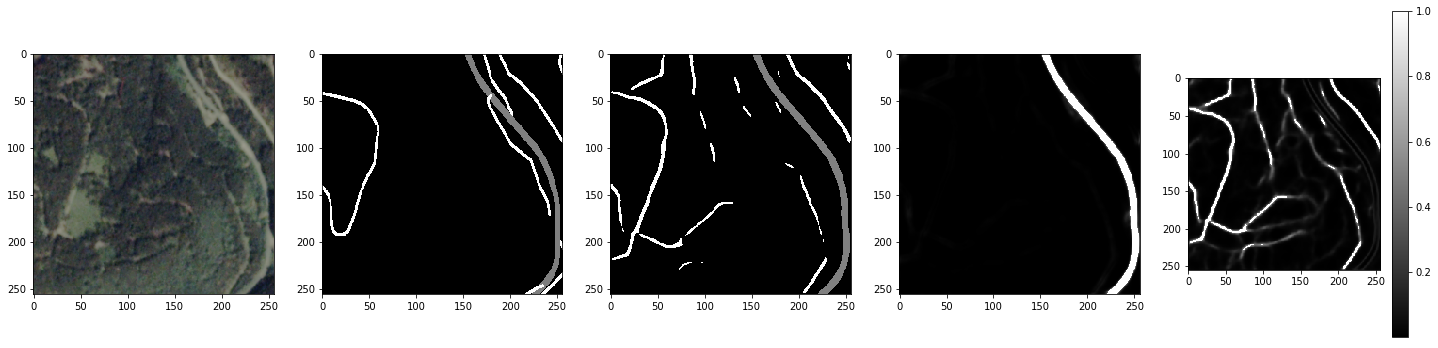

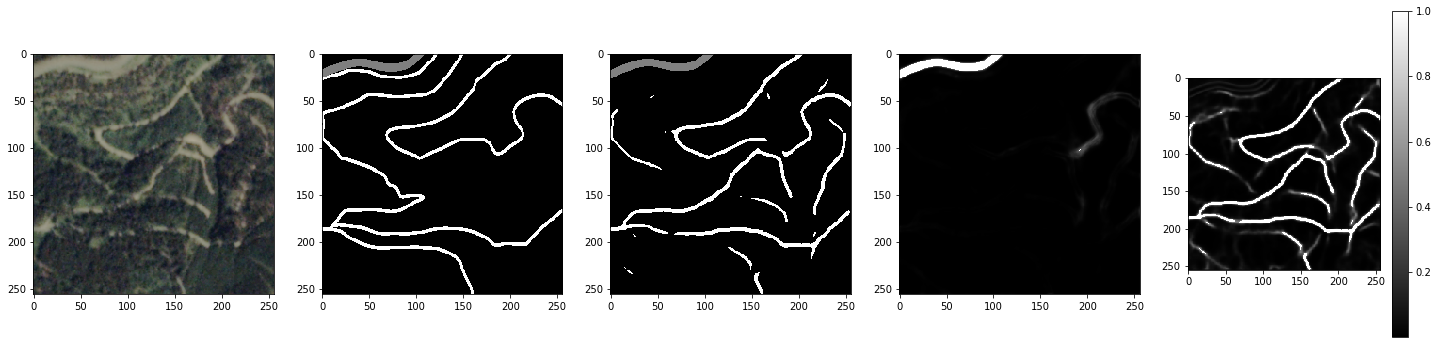

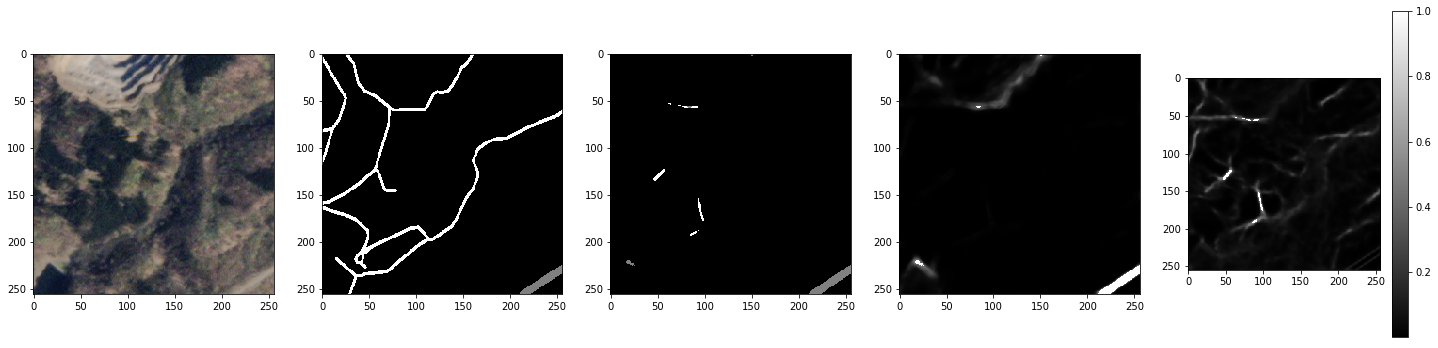

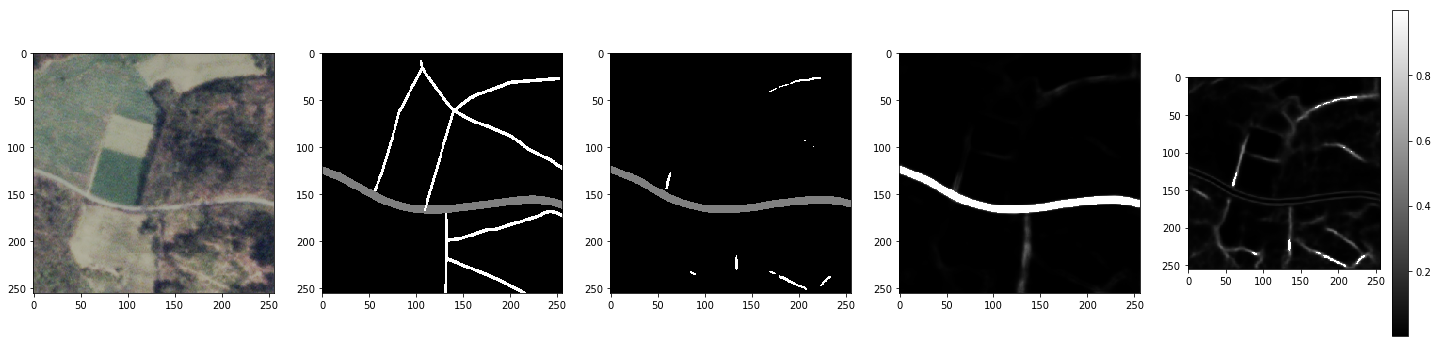

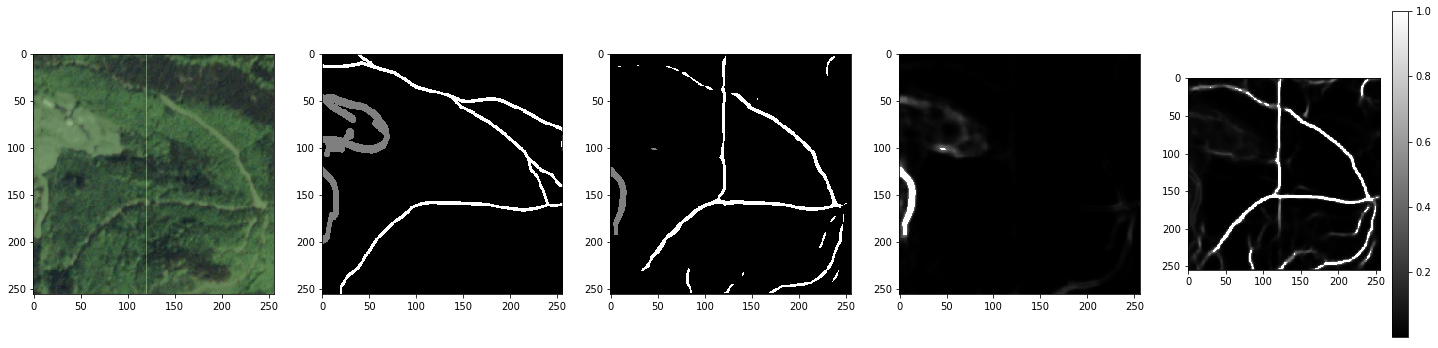

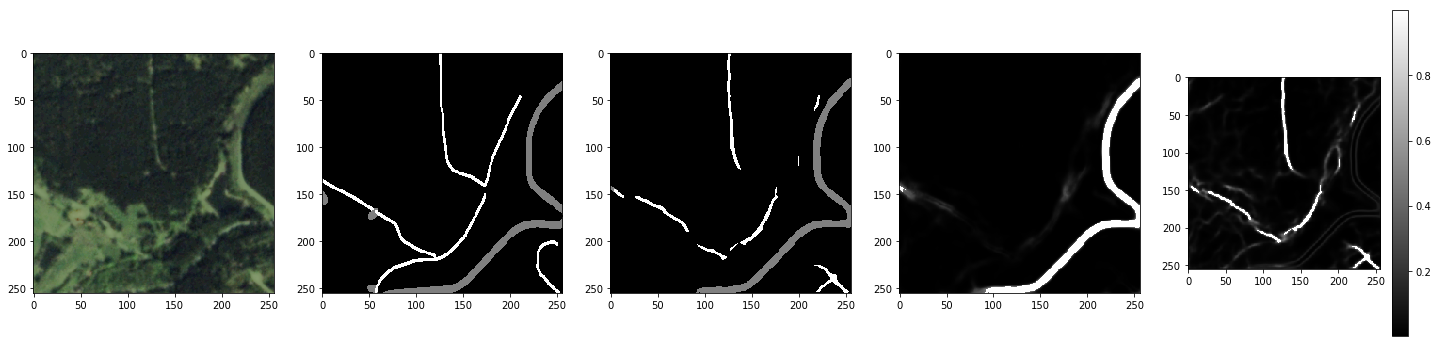

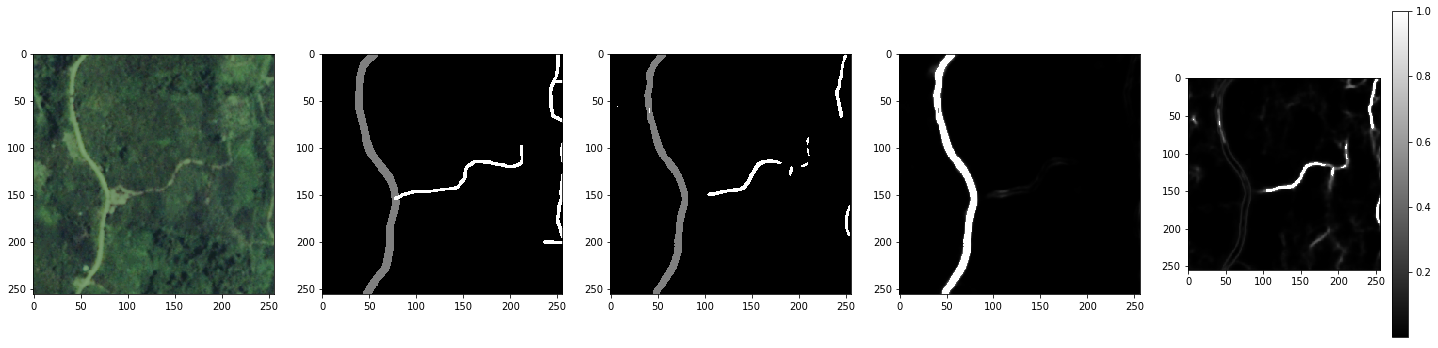

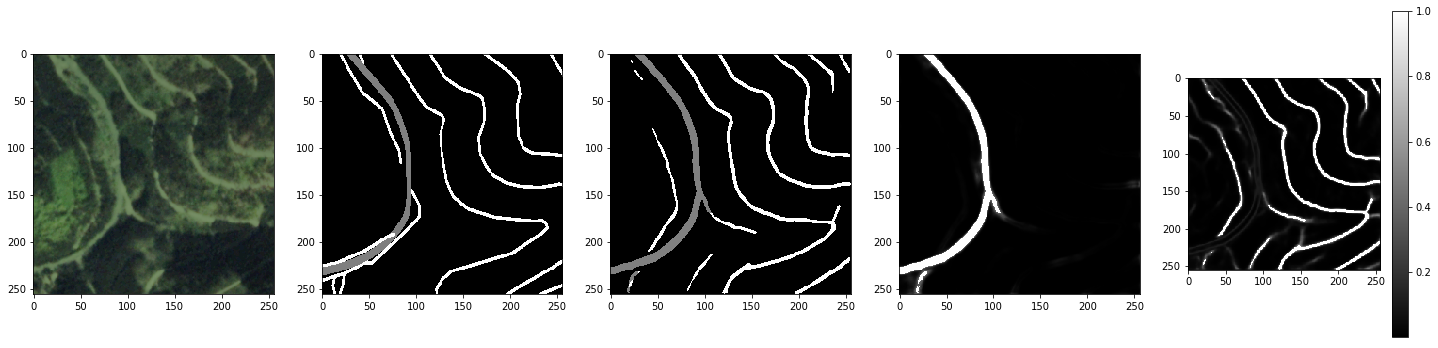

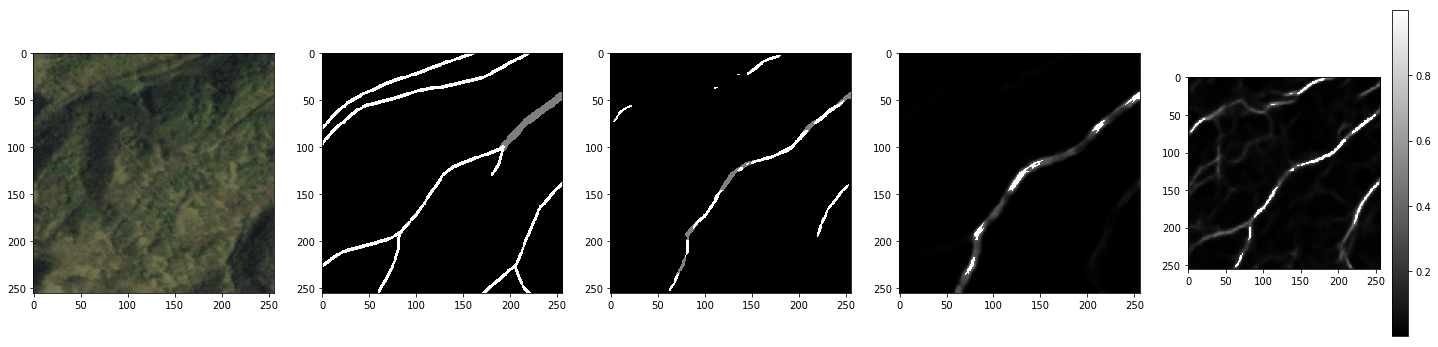

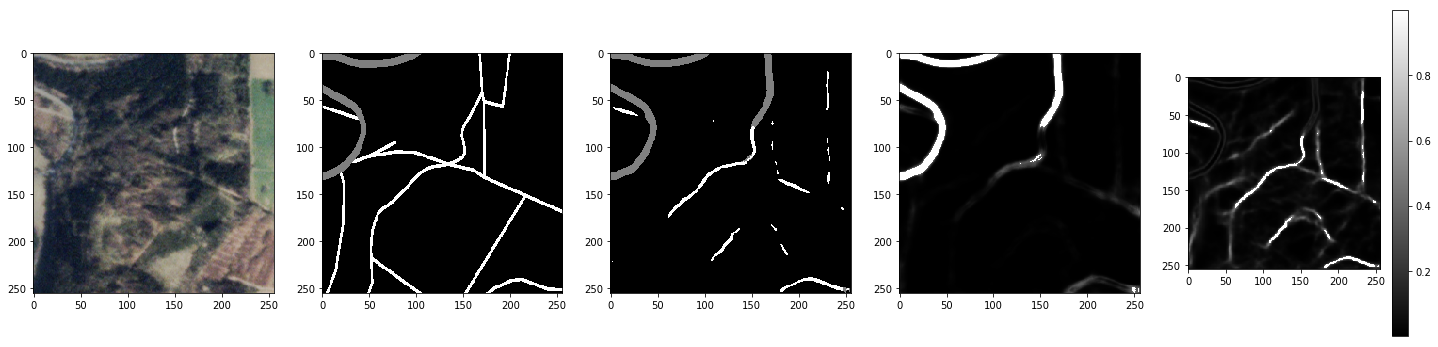

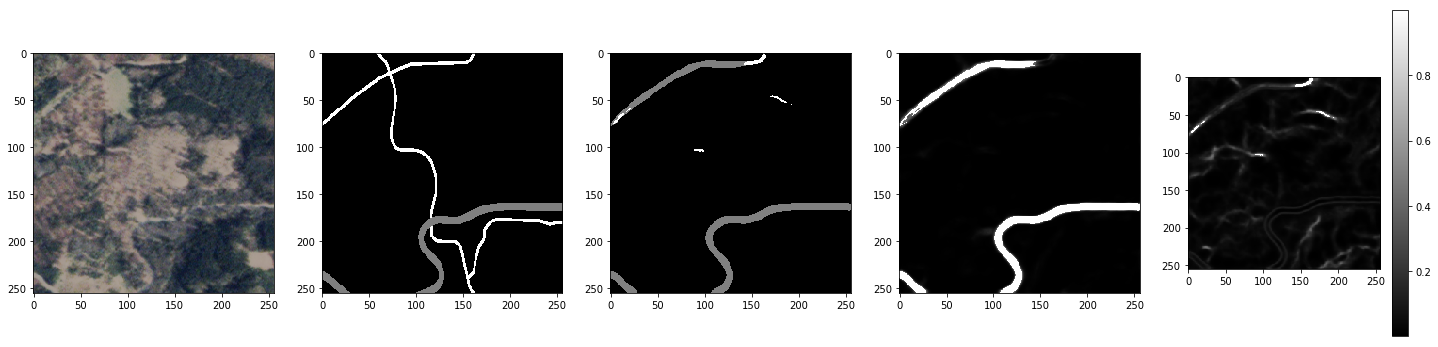

In [38]:
n = 0
for file in Path(test_dir+"sat").iterdir():
    if file.name.endswith(('.tiff', '.tif')):
        
        show_prediction(n, **get_image_paths(file.name))
        n +=1
        if(n>20):
            break

In [33]:
print(np.exp([.0000000001])/np.exp([1.]))

[0.36787944]
